In [98]:
import pandas as pd
import numpy as np
import itertools
pd.set_option('display.max_columns', None)

In [99]:
final_probs = pd.read_csv('final_safe_probabilities.csv')
final_probs

,game_str,play_id,timestamp,player_position,position,play_type,home_team,away_team,top_bottom_inning,pitcher,catcher,first_base,second_base,third_base,shortstop,left_field,center_field,right_field,batter,first_baserunner,second_baserunner,third_baserunner,field_x_7,field_y_7,field_x_8,field_y_8,field_x_9,field_y_9,field_x_10,field_y_10,field_x_11,field_y_11,field_x_12,field_y_12,ball_position_x,ball_position_y,ball_position_z,hist_as,asplus,runner_id,from_base,to_base,attempted,was_safe,runner_x,runner_y,runner_dist_to_base,fielder_x,fielder_y,fielder_dist_to_base,baserunner_player_id,player_id,num_appearances,peak_speed_ft_per_s,pct90_speed_ft_per_s,safe_probability
0,y1_d001_CGA_QEA,108,4098455,8,center field,ball acquired,QEA,CGA,top,QEA-0404,QEA-0071,QEA-0263,QEA-0365,QEA-0180,QEA-0027,QEA-0249,QEA-0235,QEA-0252,CGA-1824,CGA-1929,CGA-1592,CGA-2010,-110.8791,230.5518,94.4808,338.4810,65.4084,291.4254,35.7615,110.5899,-44.5356,100.8936,-62.0019,65.0769,95.34480,339.4440,0.000000,0.102619,114.200733,10,Home,2B,True,True,35.7615,110.5899,39.346871,94.4808,338.4810,231.626499,CGA-1824,CGA-1824,7.0,28.322210,27.656672,0.996948
1,y1_d001_CGA_QEA,114,4231155,9,right field,ball acquired,QEA,CGA,top,QEA-0404,QEA-0071,QEA-0263,QEA-0365,QEA-0180,QEA-0027,QEA-0249,QEA-0235,QEA-0252,CGA-1353,CGA-1824,CGA-1929,CGA-1592,-121.0008,236.3949,28.4658,327.7230,139.5966,299.0814,61.1802,61.2882,NaN,NaN,NaN,NaN,138.17340,295.9152,5.194530,0.102367,107.931899,10,Home,2B,True,True,61.1802,61.2882,89.783392,139.5966,299.0814,221.583436,CGA-1353,CGA-1353,3.0,23.617302,22.445863,0.978368
2,y1_d001_CGA_QEA,216,8333280,9,right field,ball acquired,QEA,CGA,top,QEA-0152,QEA-0071,QEA-0263,QEA-0365,QEA-0180,QEA-0027,QEA-0249,QEA-0235,QEA-0252,CGA-1929,CGA-1592,CGA-1547,NaN,-119.2062,233.3106,-29.9289,274.1229,188.1207,245.4093,56.9868,46.3326,NaN,NaN,-50.5641,38.5989,188.00880,246.3627,0.000000,0.102367,107.931899,10,Home,2B,True,True,56.9868,46.3326,98.766010,188.1207,245.4093,222.283963,CGA-1929,CGA-1929,3.0,28.405855,27.655517,0.812507
3,y1_d002_CGA_QEA,92,3087421,7,left field,ball acquired,QEA,CGA,bottom,CGA-2074,CGA-1127,CGA-1592,CGA-1824,CGA-1198,CGA-2010,CGA-1353,CGA-1458,CGA-1547,QEA-0252,QEA-0235,QEA-0120,NaN,-200.5506,236.1000,-61.6011,276.9882,113.8962,207.5649,57.1884,47.2554,-6.3957,122.2593,-57.1140,67.5888,-201.44550,237.1629,0.000000,0.085549,94.428842,10,Home,2B,True,True,57.1884,47.2554,98.131108,-200.5506,236.1000,228.305395,QEA-0252,QEA-0252,27.0,28.366512,24.333189,0.928305
4,y1_d003_CGA_QEA,92,3994106,9,right field,ball acquired,QEA,CGA,bottom,CGA-1302,CGA-1503,CGA-1592,CGA-1458,CGA-1166,CGA-2010,CGA-1824,CGA-1547,CGA-1198,QEA-0249,QEA-0365,NaN,NaN,-136.9167,241.8789,51.5217,335.9463,69.6903,327.1002,59.4930,72.1209,NaN,NaN,NaN,NaN,67.77840,325.8180,0.011808,0.094821,99.976237,10,Home,2B,True,True,59.4930,72.1209,80.939068,69.6903,327.1002,211.888716,QEA-0249,QEA-0249,49.0,27.627580,26.671594,0.958351
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1529,y2_d094_QZE_RZQ,341,11657364,8,center field,ball acquired,RZQ,QZE,bottom,QZE-2449,QZE-2394,QZE-1252,QZE-1479,QZE-2357,QZE-1245,QZE-2280,QZE-1638,QZE-2217,RZQ-0310,RZQ-0275,RZQ-0231,NaN,-97.8660,261.7449,-2.0037,243.5127,118.4931,246.9180,47.1309,35.7042,1.6380,124.4088,-61.2816,60.3006,-3.23607,247.2696,-0.501801,0.071692,79.783048,12,2B,Home,True,True,-61.2816,60.3006,85.974397,-2.0037,243.5127,243.520943,RZQ-0231,RZQ-0231,77.0,28.361251,26.829093,0.951756
1530,y2_d094_QZE_RZQ,344,11857564,9,right field,ball acquired,RZQ,QZE,bottom,QZE-2449,QZE-2394,QZE-1252,QZE-1479,QZE-2357,QZE-1245,QZE-2280,QZE-1638,QZE-2217,RZQ-0414,RZQ-0347,RZQ-0310,NaN,-106.7781,143.1831,66.1776,264.8085,233.5866,234.6720,20.2089,125.0232,-60.2076,60.5493,-13.8180,9.9936,233.13270,228.2667,-1.903200,0.063761,67.227633,12,2B,Home,True,Tr

In [100]:
with_outs = pd.read_csv('outs.csv')[['game_str', 'play_id', 'outs']]

with_outs_grouped = with_outs.groupby(['game_str', 'play_id', 'outs']).count().reset_index()

In [101]:
final_probs_outs = final_probs.merge(with_outs_grouped, on=['game_str', 'play_id'], how='left')
final_probs_outs = final_probs_outs[final_probs_outs['outs'] < 3]
final_probs_outs

,game_str,play_id,timestamp,player_position,position,play_type,home_team,away_team,top_bottom_inning,pitcher,catcher,first_base,second_base,third_base,shortstop,left_field,center_field,right_field,batter,first_baserunner,second_baserunner,third_baserunner,field_x_7,field_y_7,field_x_8,field_y_8,field_x_9,field_y_9,field_x_10,field_y_10,field_x_11,field_y_11,field_x_12,field_y_12,ball_position_x,ball_position_y,ball_position_z,hist_as,asplus,runner_id,from_base,to_base,attempted,was_safe,runner_x,runner_y,runner_dist_to_base,fielder_x,fielder_y,fielder_dist_to_base,baserunner_player_id,player_id,num_appearances,peak_speed_ft_per_s,pct90_speed_ft_per_s,safe_probability,outs
0,y1_d001_CGA_QEA,108,4098455,8,center field,ball acquired,QEA,CGA,top,QEA-0404,QEA-0071,QEA-0263,QEA-0365,QEA-0180,QEA-0027,QEA-0249,QEA-0235,QEA-0252,CGA-1824,CGA-1929,CGA-1592,CGA-2010,-110.8791,230.5518,94.4808,338.4810,65.4084,291.4254,35.7615,110.5899,-44.5356,100.8936,-62.0019,65.0769,95.3448,339.4440,0.000000,0.102619,114.200733,10,Home,2B,True,True,35.7615,110.5899,39.346871,94.4808,338.4810,231.626499,CGA-1824,CGA-1824,7.0,28.322210,27.656672,0.996948,1
1,y1_d001_CGA_QEA,114,4231155,9,right field,ball acquired,QEA,CGA,top,QEA-0404,QEA-0071,QEA-0263,QEA-0365,QEA-0180,QEA-0027,QEA-0249,QEA-0235,QEA-0252,CGA-1353,CGA-1824,CGA-1929,CGA-1592,-121.0008,236.3949,28.4658,327.7230,139.5966,299.0814,61.1802,61.2882,NaN,NaN,NaN,NaN,138.1734,295.9152,5.194530,0.102367,107.931899,10,Home,2B,True,True,61.1802,61.2882,89.783392,139.5966,299.0814,221.583436,CGA-1353,CGA-1353,3.0,23.617302,22.445863,0.978368,1
2,y1_d001_CGA_QEA,216,8333280,9,right field,ball acquired,QEA,CGA,top,QEA-0152,QEA-0071,QEA-0263,QEA-0365,QEA-0180,QEA-0027,QEA-0249,QEA-0235,QEA-0252,CGA-1929,CGA-1592,CGA-1547,NaN,-119.2062,233.3106,-29.9289,274.1229,188.1207,245.4093,56.9868,46.3326,NaN,NaN,-50.5641,38.5989,188.0088,246.3627,0.000000,0.102367,107.931899,10,Home,2B,True,True,56.9868,46.3326,98.766010,188.1207,245.4093,222.283963,CGA-1929,CGA-1929,3.0,28.405855,27.655517,0.812507,1
3,y1_d002_CGA_QEA,92,3087421,7,left field,ball acquired,QEA,CGA,bottom,CGA-2074,CGA-1127,CGA-1592,CGA-1824,CGA-1198,CGA-2010,CGA-1353,CGA-1458,CGA-1547,QEA-0252,QEA-0235,QEA-0120,NaN,-200.5506,236.1000,-61.6011,276.9882,113.8962,207.5649,57.1884,47.2554,-6.3957,122.2593,-57.1140,67.5888,-201.4455,237.1629,0.000000,0.085549,94.428842,10,Home,2B,True,True,57.1884,47.2554,98.131108,-200.5506,236.1000,228.305395,QEA-0252,QEA-0252,27.0,28.366512,24.333189,0.928305,0
4,y1_d003_CGA_QEA,92,3994106,9,right field,ball acquired,QEA,CGA,bottom,CGA-1302,CGA-1503,CGA-1592,CGA-1458,CGA-1166,CGA-2010,CGA-1824,CGA-1547,CGA-1198,QEA-0249,QEA-0365,NaN,NaN,-136.9167,241.8789,51.5217,335.9463,69.6903,327.1002,59.4930,72.1209,NaN,NaN,NaN,NaN,67.7784,325.8180,0.011808,0.094821,99.976237,10,Home,2B,True,True,59.4930,72.1209,80.939068,69.6903,327.1002,211.888716,QEA-0249,QEA-0249,49.0,27.627580,26.671594,0.958351,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1810,y2_d094_QZE_RZQ,344,11857564,9,right field,ball acquired,RZQ,QZE,bottom,QZE-2449,QZE-2394,QZE-1252,QZE-1479,QZE-2357,QZE-1245,QZE-2280,QZE-1638,QZE-2217,RZQ-0414,RZQ-0347,RZQ-0310,NaN,-106.7781,143.1831,66.1776,264.8085,233.5866,234.6720,20.2089,125.0232,-60.2076,60.5493,-13.8180,9.9936,233.1327,228.2667,-1.903200,0.063761,67.227633,12,2B,Home,True,True,-13.8180,9.9936,17.053128,233.5866,234.6720,331.109721,RZQ-0310,RZQ-0310,87.0,30.062055,28.691501,1.000000,2
1812,y2_d095_QZE_RZQ,97,2945498,7,left field,ball acquired,RZQ,QZE,bottom,QZE-2482,QZE-2394,QZE-1252,QZE-1479,QZE-2357,QZE-1888,QZE-2217,QZE-1638,QZE-2280,RZQ-0414,RZQ-0040,RZQ-0409,NaN,-100.2816,242.7507,-29.2206,301.5186,117.9345,262.6098,23.4867,17.3817,10.9254,123.0792,-60.0858,78.1305,-100.0560,246.7371,1.275069,0.110109,121.537404,12,

<Axes: title={'center': 'Safe Probability vs Cutoff'}, xlabel='outs', ylabel='safe_probability'>

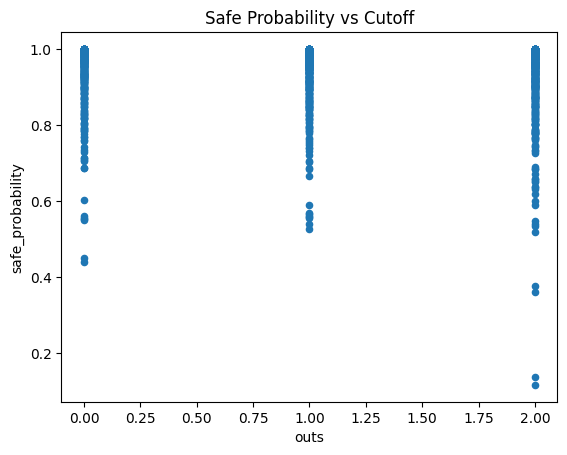

In [102]:
final_probs_outs.plot(x='outs', y='safe_probability', kind='scatter', title='Safe Probability vs Cutoff')

In [123]:
re_0_out = {
    '000': 0.503, '100': 0.842, '010': 1.089, '001': 1.288, '110': 1.365, '101': 1.645, '011': 1.809, '111': 2.305
}

re_1_out = {'000': 0.236, '100': 0.404, '010': 0.564, '001': 0.873, '110': 0.860, '101': 1.119, '011': 1.253, '111': 1.543
}


re_2_out = {'000': 0.087, '100': 0.165, '010': 0.273, '001': 0.316, '110': 0.394, '101': 0.482, '011': 0.539, '111': 0.759
}

base_index = {'1B': 0, '2B': 1, '3B': 2}

def compute_ev_from_paths(attempts_dict, starting_outs):
    total_ev = 0
    advancements = list(attempts_dict.keys())

    for outcome in itertools.product([0, 1], repeat=len(advancements)):
        outcome_prob = 1
        base_state = ['0', '0', '0']
        runs_scored = 0
        num_outs = starting_outs

        for i, adv in enumerate(advancements):
            p_success = attempts_dict[adv]
            success = outcome[i]
            outcome_prob *= p_success if success else (1 - p_success)

            from_base, to_base = adv.split("->")

            if success:
                if to_base == "Home":
                    runs_scored += 1
                else:
                    base_state[base_index[to_base]] = '1'
            else:
                num_outs += 1  # add an out if the runner fails

        base_str = ''.join(base_state)
        if num_outs >= 3:
            RE = 0
        elif num_outs == 2:
            RE = re_2_out.get(base_str, 0)
        elif num_outs == 1:
            RE = re_1_out.get(base_str, 0)
        else:  # 0 outs
            RE = re_0_out.get(base_str, 0)

        total_ev += outcome_prob * (RE + runs_scored)

    return total_ev

In [124]:
example_attempts = {
    "1B->Home": 0.65,
    "Home->2B": 0.85
}

ev = compute_ev_from_paths(example_attempts, 0)
ev

1.44704

In [125]:
def simulate_all_actions(group, starting_outs):

    # make a dictionary like {"1B->3B": 0.7}
    attempts_dict = {
        f"{row['from_base']}->{row['to_base']}": row['safe_probability']
        for _, row in group.iterrows()
    }

    home_attempts = {k: v for k, v in attempts_dict.items() if k.endswith("->Home")}
    non_home_attempts = {k: v for k, v in attempts_dict.items() if not k.endswith("->Home")}

    evs = {}

    #  letting the ball through - assume all non-home runners are safe, home runner probabilistic
    if home_attempts:
        # If there are home runners: treat home probabilistically, others safe
        let_attempts = {k: 1.0 for k in non_home_attempts}
        let_attempts.update(home_attempts)  # keep actual probabilities for home attempts
    else:
        # If no home runners: treat third base probabilistically, others safe
        let_attempts = {}
        for k, v in non_home_attempts.items():
            if k.endswith("->3B"):
                let_attempts[k] = v  # third base runner treated probabilistically
            else:
                let_attempts[k] = 1.0  # all other runners safe

    evs['let'] = compute_ev_from_paths(let_attempts, starting_outs)
    # cut and hold - assume everyone safe at targeted base (no throws), basically error prevention
    cut_hold_attempts = {k: 1.0 for k in attempts_dict}
    evs['cut_hold'] = compute_ev_from_paths(cut_hold_attempts, starting_outs)

    # cut and relay - assume home runner is safe, others probabilistic
    cut_relay_attempts = {}
    for k in attempts_dict:
        if k.endswith("->Home"):
            cut_relay_attempts[k] = 1.0 
        else:
            cut_relay_attempts[k] = attempts_dict[k] 
    evs['cut_relay'] = compute_ev_from_paths(cut_relay_attempts, starting_outs)

    return evs


In [106]:
grouped = final_probs_outs.groupby(['game_str', 'play_id'])

results = []

for (game_str, play_id), group in grouped:

    starting_outs = group['outs'].iloc[0]

    evs = simulate_all_actions(group, starting_outs)
    evs['game_str'] = game_str
    evs['play_id'] = play_id

    ev_values = [evs['let'], evs['cut_hold'], evs['cut_relay']]
    if max(ev_values) - min(ev_values) < 0.04714285714285714:
        evs['optimal_action'] = 'cut_hold'
    else:
        evs['optimal_action'] = min(
            {'let': evs['let'], 'cut_hold': evs['cut_hold'], 'cut_relay': evs['cut_relay']},
            key=lambda x: evs[x]
        )

    results.append(evs)

ev_df = pd.DataFrame(results)


In [107]:
ev_df['optimal_action'].value_counts() # I feel like this is fair?


optimal_action
cut_hold     496
let          185
cut_relay    121
Name: count, dtype: int64

In [108]:
cutoff_decisions = final_probs_outs.merge(ev_df, on=['game_str', 'play_id'], how='left')  
cutoff_decisions_short = cutoff_decisions[['game_str', 'play_id', 'timestamp', 'position', 'from_base', 'to_base', 'was_safe', 'safe_probability', 'optimal_action']]
cutoff_decisions_short

,game_str,play_id,timestamp,position,from_base,to_base,was_safe,safe_probability,optimal_action
0,y1_d001_CGA_QEA,108,4098455,center field,Home,2B,True,0.996948,let
1,y1_d001_CGA_QEA,114,4231155,right field,Home,2B,True,0.978368,cut_hold
2,y1_d001_CGA_QEA,216,8333280,right field,Home,2B,True,0.812507,cut_relay
3,y1_d002_CGA_QEA,92,3087421,left field,Home,2B,True,0.928305,cut_relay
4,y1_d003_CGA_QEA,92,3994106,right field,Home,2B,True,0.958351,cut_hold
...,...,...,...,...,...,...,...,...,...
1679,y2_d094_QZE_RZQ,344,11857564,right field,2B,Home,True,1.000000,cut_relay
1680,y2_d095_QZE_RZQ,97,2945498,left field,2B,Home,True,0.855722,cut_relay
1681,y2_d095_QZE_RZQ,97,2945498,left field,2B,Home,True,0.855722,cut_relay
1682,y2_d095_QZE_RZQ,261,8351098,right field,2B,Home,True,0.999998,cut_hold


In [109]:
cutoff_decisions[cutoff_decisions['game_str'] == 'y2_d073_XFE_RZQ'].sort_values(by='timestamp')

,game_str,play_id,timestamp,player_position,position,play_type,home_team,away_team,top_bottom_inning,pitcher,catcher,first_base,second_base,third_base,shortstop,left_field,center_field,right_field,batter,first_baserunner,second_baserunner,third_baserunner,field_x_7,field_y_7,field_x_8,field_y_8,field_x_9,field_y_9,field_x_10,field_y_10,field_x_11,field_y_11,field_x_12,field_y_12,ball_position_x,ball_position_y,ball_position_z,hist_as,asplus,runner_id,from_base,to_base,attempted,was_safe,runner_x,runner_y,runner_dist_to_base,fielder_x,fielder_y,fielder_dist_to_base,baserunner_player_id,player_id,num_appearances,peak_speed_ft_per_s,pct90_speed_ft_per_s,safe_probability,outs,let,cut_hold,cut_relay,optimal_action
476,y2_d073_XFE_RZQ,46,3211566,8,center field,ball acquired,RZQ,XFE,top,RZQ-0292,RZQ-0395,RZQ-0040,RZQ-0347,RZQ-0317,RZQ-0310,RZQ-0346,RZQ-0275,RZQ-0279,XFE-1156,NaN,XFE-2310,NaN,-134.8821,237.4740,73.0392,365.6325,85.0410,372.3765,39.0456,107.0373,NaN,NaN,-54.0003,42.6936,81.2982,373.0770,0.000000,0.102061,113.579661,10,Home,2B,True,True,39.0456,107.0373,43.852802,73.0392,365.6325,249.560002,XFE-1156,XFE-1156,15.0,27.183574,24.677512,0.998249,1,1.563983,1.564,1.563165,cut_hold
1637,y2_d073_XFE_RZQ,46,3211566,8,center field,ball acquired,RZQ,XFE,top,RZQ-0292,RZQ-0395,RZQ-0040,RZQ-0347,RZQ-0317,RZQ-0310,RZQ-0346,RZQ-0275,RZQ-0279,XFE-1156,NaN,XFE-2310,NaN,-134.8821,237.4740,73.0392,365.6325,85.0410,372.3765,39.0456,107.0373,NaN,NaN,-54.0003,42.6936,81.2982,373.0770,0.000000,0.102061,113.579661,12,2B,Home,True,True,-54.0003,42.6936,68.838767,73.0392,365.6325,372.856339,XFE-2310,XFE-2310,7.0,27.103937,26.699628,0.999987,1,1.563983,1.564,1.563165,cut_hold
477,y2_d073_XFE_RZQ,100,5144366,9,right field,ball acquired,RZQ,XFE,bottom,XFE-2020,XFE-1156,XFE-1704,XFE-1076,XFE-1082,XFE-1405,XFE-2568,XFE-2484,XFE-1064,RZQ-0310,RZQ-0395,NaN,NaN,-107.4576,157.8315,-3.4083,297.0273,229.9983,249.3276,51.0033,95.2743,-52.5486,94.7706,NaN,NaN,231.0816,248.0052,0.000000,0.090877,95.816802,10,Home,2B,True,True,51.0033,95.2743,60.065436,229.9983,249.3276,260.505777,RZQ-0310,RZQ-0310,87.0,30.062055,28.691501,0.978400,1,1.252983,1.253,1.232744,cut_hold
1056,y2_d073_XFE_RZQ,100,5144366,9,right field,ball acquired,RZQ,XFE,bottom,XFE-2020,XFE-1156,XFE-1704,XFE-1076,XFE-1082,XFE-1405,XFE-2568,XFE-2484,XFE-1064,RZQ-0310,RZQ-0395,NaN,NaN,-107.4576,157.8315,-3.4083,297.0273,229.9983,249.3276,51.0033,95.2743,-52.5486,94.7706,NaN,NaN,231.0816,248.0052,0.000000,0.090877,95.816802,11,1B,3B,True,True,-52.5486,94.7706,33.047442,229.9983,249.3276,347.423856,RZQ-0395,RZQ-0395,12.0,25.777883,25.496569,0.999982,1,1.252983,1.253,1.232744,cut_hold
478,y2_d073_XFE_RZQ,173,15446566,8,center field,ball acquired,RZQ,XFE,top,RZQ-0285,RZQ-0395,RZQ-0040,RZQ-0347,RZQ-0317,RZQ-0310,RZQ-0346,RZQ-0275,RZQ-0279,XFE-1082,XFE-1064,XFE-1156,NaN,-97.5744,289.6452,-89.4555,318.5229,107.7621,207.7686,60.3678,75.4353,-37.2288,108.9573,-39.5109,30.7137,-90.2466,319.6530,1.764300,0.102061,113.579661,10,Home,2B,True,True,60.3678,75.4353,79.392629,-89.4555,318.5229,211.384266,XFE-1082,XFE-1082,5.0,22.951879,22.901739,0.988678,0,2.808994,2.809,2.798132,cut_hold
1057,y2_d073_XFE_RZQ,173,15446566,8,center field,ball acquired,RZQ,XFE,top,RZQ-0285,RZQ-0395,RZQ-0040,RZQ-0347,RZQ-0317,RZQ-0310,RZQ-0346,RZQ-0275,RZQ-0279,XFE-1082,XFE-1064,XFE-1156,NaN,-97.5744,289.6452,-89.4555,318.5229,107.7621,207.7686,60.3678,75.4353,-37.2288,108.9573,-39.5109,30.7137,-90.2466,319.6530,1.764300,0.102061,113.579661,11,1B,3B,True,True,-37.2288,108.9573,52.451970,-89.4555,318.5229,256.186910,XFE-1064,XFE-1064,6.0,23.969312,23.543520,0.999782,0,2.808994,2.809,2.798132,cut_hold
1638,y2_d073_XFE_RZQ,173,15446566,8,center field,ball acquired,RZQ,XFE,top,RZQ-0285,RZQ-0395,RZQ-0040,RZQ-0347,RZQ-0317,RZQ-0310,RZQ-0346,RZQ-0275,RZQ-0279,XFE-1082,XFE-1064,XFE-1156,NaN,-97.5744,289.6452,-89.4555,318.5229,107.7621,207.7686,60.3678,75.4353,-37.2288,108.9573,-39.5109,30.7137,-90.2466,319.6530,1.764300,0.102061,113.579661,12,

In [110]:
cutoff_decisions.sort_values(by = 'safe_probability', ascending=True).head(20)

,game_str,play_id,timestamp,player_position,position,play_type,home_team,away_team,top_bottom_inning,pitcher,catcher,first_base,second_base,third_base,shortstop,left_field,center_field,right_field,batter,first_baserunner,second_baserunner,third_baserunner,field_x_7,field_y_7,field_x_8,field_y_8,field_x_9,field_y_9,field_x_10,field_y_10,field_x_11,field_y_11,field_x_12,field_y_12,ball_position_x,ball_position_y,ball_position_z,hist_as,asplus,runner_id,from_base,to_base,attempted,was_safe,runner_x,runner_y,runner_dist_to_base,fielder_x,fielder_y,fielder_dist_to_base,baserunner_player_id,player_id,num_appearances,peak_speed_ft_per_s,pct90_speed_ft_per_s,safe_probability,outs,let,cut_hold,cut_relay,optimal_action
1124,y1_d006_JJS_YJD,163,5334253,7,left field,ball acquired,YJD,JJS,top,YJD-0362,YJD-0007,YJD-0223,YJD-0025,YJD-0172,YJD-0066,YJD-0185,YJD-0338,YJD-0327,JJS-1625,JJS-2128,NaN,NaN,-176.7309,174.6540,-37.7355,267.3633,128.8443,216.9270,60.7098,66.8736,-21.8871,125.7783,NaN,NaN,-177.69360,174.4893,0.000000,0.106383,117.425221,11,1B,Home,True,True,-21.8871,125.7783,127.668422,-176.7309,174.6540,248.470986,JJS-2128,NaN,NaN,NaN,26.907462,0.116770,2,0.179708,1.539,1.368711,let
1175,y1_d079_PVJ_RZQ,137,8024016,9,right field,ball acquired,RZQ,PVJ,top,RZQ-0324,RZQ-0169,RZQ-0214,RZQ-0258,RZQ-0347,RZQ-0355,RZQ-0333,RZQ-0274,RZQ-0233,PVJ-2316,PVJ-1591,PVJ-1833,NaN,-105.1206,251.6229,3.0564,290.4333,142.9632,195.5718,46.5810,41.0664,8.5911,124.2912,-61.2162,63.0735,145.79550,194.9184,2.384589,0.101700,107.228895,11,1B,Home,True,True,8.5911,124.2912,124.587758,142.9632,195.5718,242.253598,PVJ-1591,NaN,NaN,NaN,26.907462,0.138711,2,1.141341,2.539,2.369014,let
1127,y1_d016_OXG_QEA,119,3720764,9,right field,ball acquired,QEA,OXG,top,QEA-0352,QEA-0071,QEA-0180,QEA-0365,QEA-0369,QEA-0027,QEA-0249,QEA-0235,QEA-0252,OXG-0018,OXG-0396,NaN,OXG-0079,-126.7062,234.9063,-13.2027,291.3813,189.2463,206.6196,60.7086,70.1634,-31.9806,115.6611,NaN,NaN,189.16020,206.2545,0.000000,0.102367,107.931899,11,1B,Home,True,False,-31.9806,115.6611,120.001037,189.2463,206.6196,280.188903,OXG-0396,OXG-0396,4.0,27.972118,26.667112,0.359783,2,0.553706,1.539,1.519596,let
1058,y2_d073_XFE_RZQ,215,16824766,7,left field,ball acquired,RZQ,XFE,top,RZQ-0145,RZQ-0395,RZQ-0040,RZQ-0347,RZQ-0317,RZQ-0310,RZQ-0346,RZQ-0275,RZQ-0279,XFE-1082,XFE-1405,XFE-1156,NaN,-130.7931,192.4365,-15.8121,292.7628,120.1857,228.5916,47.6859,41.1486,17.5701,114.7767,-59.0742,67.5762,-130.80420,195.1851,-0.724911,0.103802,114.575769,11,1B,3B,True,True,17.5701,114.7767,95.968966,-130.7931,192.4365,145.251772,XFE-1405,XFE-1405,9.0,28.500117,26.218359,0.378097,2,1.148556,1.316,1.119479,cut_relay
1125,y1_d007_JJS_YJD,179,6122609,9,right field,ball acquired,YJD,JJS,bottom,JJS-2460,JJS-2059,JJS-2517,JJS-1110,JJS-1116,JJS-2187,JJS-2238,JJS-1890,JJS-2128,YJD-0223,NaN,YJD-0185,NaN,-93.7746,255.3978,68.0577,329.1822,91.0401,308.8788,57.4989,48.6741,-10.7091,124.4847,NaN,NaN,89.45550,305.8950,-0.402426,0.102620,108.198756,11,1B,Home,True,True,-10.7091,124.4847,124.944489,91.0401,308.8788,322.016169,NaN,NaN,NaN,NaN,26.907462,0.439281,0,1.936521,2.809,2.728168,let
1076,y2_d080_YJD_RZQ,149,4725748,7,left field,ball acquired,RZQ,YJD,bottom,YJD-0420,YJD-0067,YJD-0366,YJD-0164,YJD-0132,YJD-0312,YJD-0397,YJD-0185,YJD-0398,RZQ-0328,RZQ-0310,RZQ-0347,NaN,-62.5338,272.9550,-61.1193,289.1829,105.8175,248.7939,56.2665,52.1325,-0.9303,126.1992,-59.4732,63.1446,-62.02410,274.6581,-1.025571,0.106383,117.425221,11,1B,3B,True,True,-0.9303,126.1992,88.578553,-62.5338,272.9550,209.317923,RZQ-0310,RZQ-0310,87.0,30.062055,28.691501,0.451700,0,2.790433,2.809,2.061032,cut_relay
631,y1_d021_JFU_YJD,122,4173886,7,left field,ball acquired,YJD,JFU,top,YJD-0362,YJD-0020,YJD-0281,YJD-0066,YJD-0172,YJD-0345,YJD-0327,YJD-0193,YJD-0338,JFU-2068,JFU-1850,JFU-1832,NaN,-141.5007,214.6950,-10.4808,293.6067,125.4678,225.4149,45.7935,32.7867,5.8452,125.0322,-60.1881,64.7184,-140.24910,213.6624,-0.342966,0.106383,117.425221,11,1B,3B,True,True,5.8

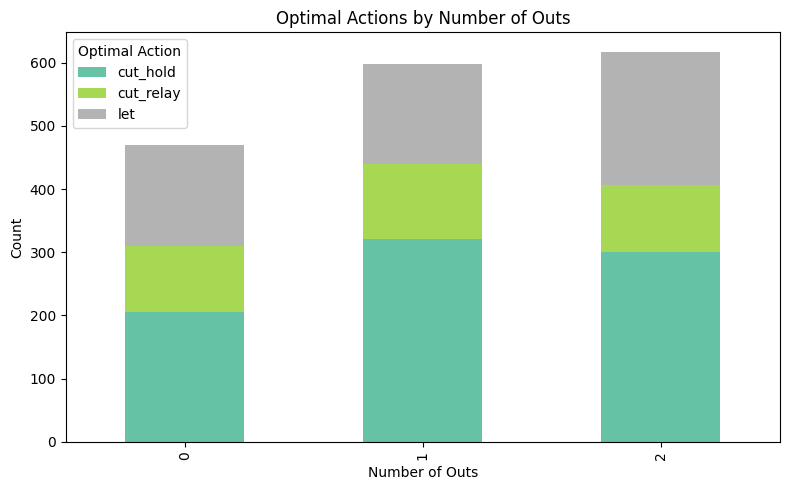

In [111]:
import matplotlib.pyplot as plt

# Count optimal actions by outs
action_counts = cutoff_decisions.groupby(['outs', 'optimal_action']).size().unstack(fill_value=0)

# Plot
action_counts.plot(kind='bar', stacked=True, figsize=(8, 5), colormap='Set2')
plt.title('Optimal Actions by Number of Outs')
plt.xlabel('Number of Outs')
plt.ylabel('Count')
plt.legend(title='Optimal Action')
plt.tight_layout()
plt.show()

In [112]:
cutoff_decisions.to_csv('all_labeled_plays.csv', index=False)

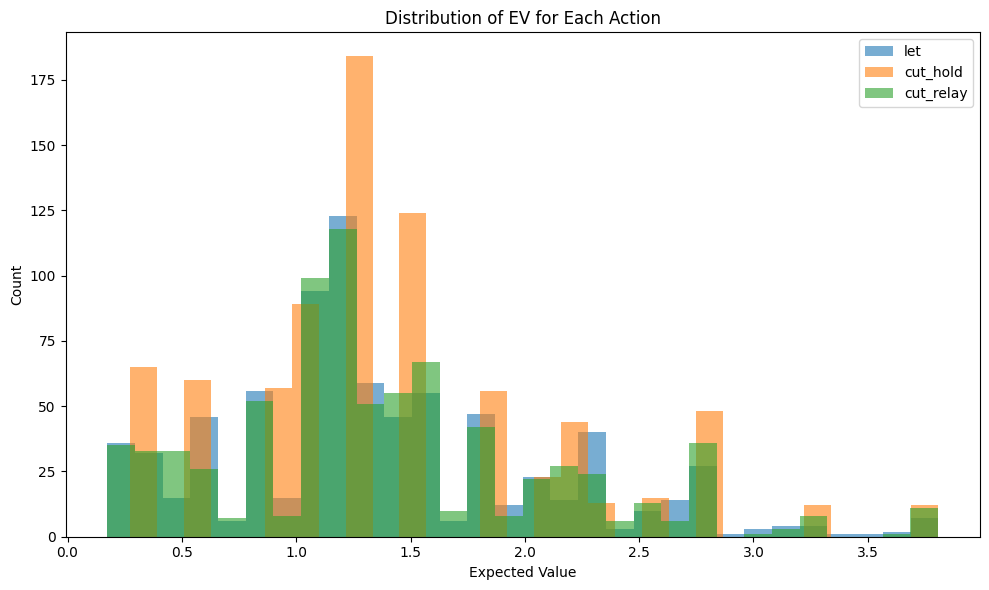

In [113]:
plt.figure(figsize=(10, 6))
plt.hist(ev_df['let'], bins=30, alpha=0.6, label='let')
plt.hist(ev_df['cut_hold'], bins=30, alpha=0.6, label='cut_hold')
plt.hist(ev_df['cut_relay'], bins=30, alpha=0.6, label='cut_relay')
plt.xlabel('Expected Value')
plt.ylabel('Count')
plt.title('Distribution of EV for Each Action')
plt.legend()
plt.tight_layout()
plt.show()

In [126]:
target_distribution = {
    'cut_hold': 427,
    'let': 180,
    'cut_relay': 95
}
total = sum(target_distribution.values())
target_proportions = {k: v / total for k, v in target_distribution.items()}
target_proportions

{'cut_hold': 0.6082621082621082,
 'let': 0.2564102564102564,
 'cut_relay': 0.13532763532763534}

In [127]:
def get_optimal_action_distribution(threshold, grouped):
    results = []

    for (game_str, play_id), group in grouped:
        starting_outs = group['outs'].iloc[0]
        evs = simulate_all_actions(group, starting_outs)
        evs['game_str'] = game_str
        evs['play_id'] = play_id

        ev_values = [evs['let'], evs['cut_hold'], evs['cut_relay']]
        if max(ev_values) - min(ev_values) < threshold:
            evs['optimal_action'] = 'cut_hold'
        else:
            evs['optimal_action'] = min(
                {'let': evs['let'], 'cut_hold': evs['cut_hold'], 'cut_relay': evs['cut_relay']},
                key=lambda x: evs[x]
            )

        results.append(evs)

    ev_df = pd.DataFrame(results)
    proportions = ev_df['optimal_action'].value_counts(normalize=True).to_dict()

    return proportions


In [128]:
def distribution_distance(dist1, dist2):
    return sum(abs(dist1[k] - dist2[k]) for k in dist1)

In [129]:
best_threshold = None
best_distance = float('inf')
best_distribution = None

threshold_range = np.linspace(0.01, 0.15, 50)

for t in threshold_range:

    current_distribution = get_optimal_action_distribution(t, grouped)
    distance = distribution_distance(current_distribution, target_proportions)

    if distance < best_distance:
        best_distance = distance
        best_threshold = t
        best_distribution = current_distribution

print("Best threshold:", best_threshold)
print("Optimal distribution:", best_distribution)
print("Target distribution:", target_proportions)

Best threshold: 0.04428571428571428
Optimal distribution: {'cut_hold': 0.600997506234414, 'let': 0.23815461346633415, 'cut_relay': 0.16084788029925187}
Target distribution: {'cut_hold': 0.6082621082621082, 'let': 0.2564102564102564, 'cut_relay': 0.13532763532763534}


In [118]:
cutoff_decisions[(cutoff_decisions['game_str'] == 'y2_d002_BEJ_RZQ') & (cutoff_decisions['play_id'] == 208)]

,game_str,play_id,timestamp,player_position,position,play_type,home_team,away_team,top_bottom_inning,pitcher,catcher,first_base,second_base,third_base,shortstop,left_field,center_field,right_field,batter,first_baserunner,second_baserunner,third_baserunner,field_x_7,field_y_7,field_x_8,field_y_8,field_x_9,field_y_9,field_x_10,field_y_10,field_x_11,field_y_11,field_x_12,field_y_12,ball_position_x,ball_position_y,ball_position_z,hist_as,asplus,runner_id,from_base,to_base,attempted,was_safe,runner_x,runner_y,runner_dist_to_base,fielder_x,fielder_y,fielder_dist_to_base,baserunner_player_id,player_id,num_appearances,peak_speed_ft_per_s,pct90_speed_ft_per_s,safe_probability,outs,let,cut_hold,cut_relay,optimal_action
296,y2_d002_BEJ_RZQ,208,7353276,7,left field,ball acquired,RZQ,BEJ,bottom,BEJ-2344,BEJ-1508,BEJ-2513,BEJ-1287,BEJ-1854,BEJ-1919,BEJ-2334,BEJ-1989,BEJ-1805,RZQ-0274,RZQ-0275,NaN,NaN,-132.7998,256.6284,-68.6799,278.7063,108.3567,236.0307,60.0609,73.6296,-33.7149,110.3784,NaN,NaN,-132.6921,255.9339,0.0,0.085259,94.107854,10,Home,2B,True,False,60.0609,73.6296,80.347441,-132.7998,256.6284,185.578310,RZQ-0274,RZQ-0274,76.0,28.712933,27.011267,0.960033,2,0.526348,0.539,0.505312,cut_hold
860,y2_d002_BEJ_RZQ,208,7353276,7,left field,ball acquired,RZQ,BEJ,bottom,BEJ-2344,BEJ-1508,BEJ-2513,BEJ-1287,BEJ-1854,BEJ-1919,BEJ-2334,BEJ-1989,BEJ-1805,RZQ-0274,RZQ-0275,NaN,NaN,-132.7998,256.6284,-68.6799,278.7063,108.3567,236.0307,60.0609,73.6296,-33.7149,110.3784,NaN,NaN,-132.6921,255.9339,0.0,0.085259,94.107854,11,1B,3B,True,True,-33.7149,110.3784,55.497654,-132.7998,256.6284,205.006343,RZQ-0275,RZQ-0275,35.0,28.834466,27.582583,0.976528,2,0.526348,0.539,0.505312,cut_hold
